In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch
import colors as EL

savename = "./figures/S1.pdf"

In [2]:
lar = pd.read_csv('./data/trajectories/cleaned_animal_analyses_acclimation.csv')
lar = lar.sort_values(by=['species', 'animal_ID'])
lar = lar.groupby('species').count()
display(lar['animal_ID'])

species
Aedes aegypti              70
Aedes albopictus           71
Anopheles arabiensis       93
Anopheles gambiae         108
Culex quinquefasciatus    110
Culex tarsalis             53
Name: animal_ID, dtype: int64

In [3]:
df = pd.read_csv('./data/stats/distance_matrix.csv', sep=" ")
display(df.head())

,2,1,4,3,6,5,8,7,10,9,...,496,497,498,499,501,500,502,504,503,505
0,0.000000,2.459376,6.702284,8.877758,5.547830,6.424876,3.283432,5.350960,5.225116,1.526742,...,6.434485,7.112030,6.845768,7.329552,6.556959,6.532139,6.361945,6.487774,4.919686,6.219676
1,2.459376,0.000000,7.078511,9.671862,5.886360,6.907153,3.907684,6.063768,5.697268,2.156877,...,7.214243,7.745120,7.319652,8.029744,7.166525,7.222971,7.204569,7.115365,5.485308,6.979048
2,6.702284,7.078511,0.000000,3.265629,1.739899,0.952999,3.681190,2.394432,1.749617,7.185394,...,1.906594,1.184709,0.926592,1.484610,4.812674,3.923951,1.912467,3.077339,2.485907,2.170233
3,8.877758,9.671862,3.265629,0.000000,4.687521,3.555829,6.269111,4.678682,4.601576,9.435125,...,3.699897,2.963584,3.321840,2.587487,6.455199,5.353126,3.677605,4.766647,5.057490,4.002620
4,5.547830,5.886360,1.739899,4.687521,0.000000,1.936253,2.482192,1.299245,1.122235,5.947026,...,2.453310,2.211480,1.853017,2.504429,3.873168,3.380655,2.058827,2.641883,1.390674,1.987426


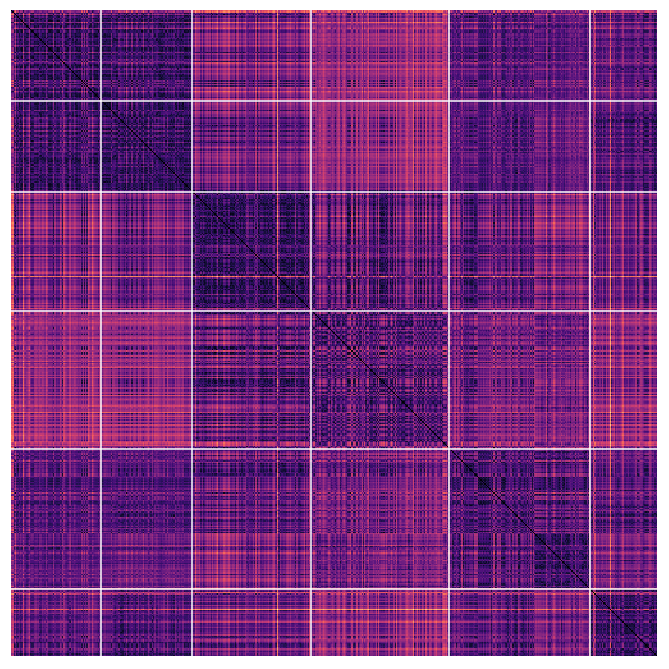

In [4]:
img_pdf = False
    
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect="equal")

img = ax.imshow(df.values, cmap='magma')

if img_pdf == True:
    img.set_visible(False)
    print(df.values.max(), df.values.min())
    cbar = fig.colorbar(img, ax=ax, orientation='horizontal')

else:
    sps = lar['animal_ID'].tolist()
    lw=1.5
    for i in range(0, len(sps)-1): 
        n = np.sum(sps[0:i+1])
        ax.plot([-1, len(df)+1], [n, n], lw=lw, color='#ffffff', zorder=20)
        ax.plot([n, n], [-1, len(df)+1], lw=lw, color='#ffffff', zorder=20)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
if img_pdf == True:
    savename = './figures/S3.pdf'
    # Save the Matplotlib figure as a PDF file:
    plt.show()
    pp = pdf.PdfPages(savename, keep_empty=False)
    pp.savefig(fig)
    pp.close()

else: 
    # Remove padding and margins from the figure and all its subplots
    savename = './figures/S3.png'
    plt.margins(0,0)
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.savefig(savename, format='png', dpi=600, pad_inches=0, transparent=True)